## 나라 언어를 예측하기

- 각 나라의 언어의 특성을 알아내어 언어를 쓰는 나라 예측하기
- 목적: 알파벳(a~z)을 사용하는 언어 식별
- 데이터 : 알파벳을 사용하는 4개국의 테스트 파일
- 전제 조건(힌트) : 나라별 자주 사용되는 알파벳이 다름
- 진행방향
  1. 전처리  
      - 나라별 알파벳 패턴 분석
  2. 학습  
      - 교차 검증 적용

In [385]:
# 모듈로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [386]:
# 알파벳 리스트 만들기
alpha_list=[]
for n in range(97,123):
    alpha_list.append(chr(n))

In [387]:
# 파일 불러서 해당 파일의 알파벳 개수 구하기
def alpha_find(filename):
    data=pd.read_table('C:/Users/whrjs/Desktop/train/'+filename+'.txt',header=None).to_numpy() # 데이터를 불러와서 배열형태로
    
    result='' # 빈 문자열
    for txt in data:
        result=result+txt[0] # 하나씩 불러와서 합치기
    result=result.lower() # 대문자를 소문자로 바꾸기

    alpha_count=[]
    for n in range(97,123): # 97이 a~ 122가 z로
        alpha_count.append(result.count(chr(n)))
    return alpha_count

In [388]:
# 파일 불러서 해당 파일의 알파벳 개수 구해서 배열로 만들기
def alpha_find_arr(filename):
    data=pd.read_table('C:/Users/whrjs/Desktop/test/'+filename+'.txt',header=None).to_numpy() # 데이터를 불러와서 배열형태로
    
    result='' # 빈 문자열
    for txt in data:
        result=result+str(txt[0]) # 하나씩 불러와서 합치기
    result=result.lower() # 대문자를 소문자로 바꾸기

    alpha_count=[]
    for n in range(97,123): # 97이 a~ 122가 z로
        alpha_count.append(result.count(chr(n)))
    return np.array(alpha_count).reshape(-1,26)

In [389]:
# 영어 데이터
en_1=alpha_find('en-1')
en_2=alpha_find('en-2')
en_3=alpha_find('en-3')
en_4=alpha_find('en-4')
en_5=alpha_find('en-5')

data_en=pd.DataFrame([en_1,en_2,en_3,en_4,en_5],columns=alpha_list)
data_en

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,349,59,210,212,484,72,88,201,340,8,...,0,357,282,370,119,45,65,3,92,2
1,706,167,255,326,1149,146,262,230,632,22,...,46,756,601,652,257,115,117,17,90,5
2,259,44,165,118,434,53,91,85,342,9,...,6,195,318,293,105,68,43,2,65,2
3,383,147,159,210,642,89,125,313,346,8,...,2,314,389,497,129,27,104,32,93,9
4,337,93,142,181,645,93,93,260,297,15,...,2,331,272,436,114,49,109,14,68,3


In [390]:
# 불어 데이터
fr_1=alpha_find('fr-6')
fr_2=alpha_find('fr-7')
fr_3=alpha_find('fr-8')
fr_4=alpha_find('fr-9')
fr_5=alpha_find('fr-10')

data_fr=pd.DataFrame([fr_1,fr_2,fr_3,fr_4,fr_5],columns=alpha_list)
data_fr

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,2162,414,992,1244,4155,327,319,350,1998,59,...,190,2074,2278,1958,1511,295,126,108,148,13
1,1230,221,599,761,2550,178,179,195,1208,51,...,112,1301,1325,1111,861,215,44,84,82,2
2,585,127,321,412,1266,105,109,116,690,35,...,47,661,536,492,344,122,6,41,40,16
3,405,59,181,266,735,62,103,100,461,20,...,24,399,371,325,225,72,2,17,27,6
4,1228,163,581,831,2347,253,167,242,1082,36,...,92,1171,1117,1210,834,223,11,61,57,13


In [391]:
# 인도네시아어 데이터
id_1=alpha_find('id-11')
id_2=alpha_find('id-12')
id_3=alpha_find('id-13')
id_4=alpha_find('id-14')
id_5=alpha_find('id-15')

data_id=pd.DataFrame([id_1,id_2,id_3,id_4,id_5],columns=alpha_list)
data_id

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,253,65,29,69,194,9,120,28,210,8,...,0,154,139,94,85,8,13,3,19,3
1,1171,196,73,313,741,88,269,147,796,42,...,0,370,646,403,322,64,40,11,108,5
2,4514,594,140,986,2129,323,1262,475,2218,188,...,0,1325,1212,1269,1235,40,104,6,371,6
3,2522,377,68,483,1039,118,672,224,1451,99,...,0,746,811,742,695,33,27,3,175,8
4,11092,1581,508,2840,5149,315,2102,1283,5464,558,...,11,3504,3350,3093,2665,185,384,19,796,70


In [392]:
# 타갈로그어 데이터
tl_1=alpha_find('tl-16')
tl_2=alpha_find('tl-17')
tl_3=alpha_find('tl-18')
tl_4=alpha_find('tl-19')
tl_5=alpha_find('tl-20')

data_tl=pd.DataFrame([tl_1,tl_2,tl_3,tl_4,tl_5],columns=alpha_list)
data_tl

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,6098,672,222,360,662,96,2633,514,2383,35,...,24,483,1341,1491,752,67,339,14,550,29
1,7231,589,164,460,758,59,2955,555,2799,23,...,8,762,1779,1475,1074,21,299,10,926,5
2,4100,376,45,228,532,5,1632,201,1256,32,...,1,480,845,1064,621,19,255,1,352,1
3,2054,264,220,252,751,57,774,220,862,22,...,5,531,682,634,322,59,95,10,270,31
4,1469,165,142,269,466,42,240,49,548,17,...,13,286,472,335,202,35,42,3,246,22


In [393]:
# 나라별 알파벳 개수 데이터(데프)
data_language_df=pd.concat([data_en,data_fr,data_id,data_tl],axis=0,ignore_index=True)
data_language_df

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
0,349,59,210,212,484,72,88,201,340,8,...,0,357,282,370,119,45,65,3,92,2
1,706,167,255,326,1149,146,262,230,632,22,...,46,756,601,652,257,115,117,17,90,5
2,259,44,165,118,434,53,91,85,342,9,...,6,195,318,293,105,68,43,2,65,2
3,383,147,159,210,642,89,125,313,346,8,...,2,314,389,497,129,27,104,32,93,9
4,337,93,142,181,645,93,93,260,297,15,...,2,331,272,436,114,49,109,14,68,3
5,2162,414,992,1244,4155,327,319,350,1998,59,...,190,2074,2278,1958,1511,295,126,108,148,13
6,1230,221,599,761,2550,178,179,195,1208,51,...,112,1301,1325,1111,861,215,44,84,82,2
7,585,127,321,412,1266,105,109,116,690,35,...,47,661,536,492,344,122,6,41,40,16
8,405,59,181,266,735,62,103,100,461,20,...,24,399,371,325,225,72,2,17,27,6
9,1228,163,581,831,2347,253,167,242,1082,36,...,92,1171,1117,1210,834,223,11,61,57,13


In [394]:
# 나라별 알파벳 개수 데이터(베열)
data_language=pd.concat([data_en,data_fr,data_id,data_tl],axis=0,ignore_index=True).to_numpy()
print(f"나라별 알파벳 개수 데이터\n{data_language}")

나라별 알파벳 개수 데이터
[[  349    59   210   212   484    72    88   201   340     8    25   247
    121   356   412    76     0   357   282   370   119    45    65     3
     92     2]
 [  706   167   255   326  1149   146   262   230   632    22    82   355
    203   449   577   170    46   756   601   652   257   115   117    17
     90     5]
 [  259    44   165   118   434    53    91    85   342     9     6   206
     81   273   277    75     6   195   318   293   105    68    43     2
     65     2]
 [  383   147   159   210   642    89   125   313   346     8    69   238
    114   311   465    89     2   314   389   497   129    27   104    32
     93     9]
 [  337    93   142   181   645    93    93   260   297    15    27   181
    132   284   302    86     2   331   272   436   114    49   109    14
     68     3]
 [ 2162   414   992  1244  4155   327   319   350  1998    59    54  1804
    873  1908  1580   809   190  2074  2278  1958  1511   295   126   108
    148    13]
 [ 1230

In [395]:
# 타켓 데이터
data_target=np.array([['en']]*5+[['fr']]*5+[['id']]*5+[['tl']]*5)
print(f"타켓 데이터\n{data_target}")

타켓 데이터
[['en']
 ['en']
 ['en']
 ['en']
 ['en']
 ['fr']
 ['fr']
 ['fr']
 ['fr']
 ['fr']
 ['id']
 ['id']
 ['id']
 ['id']
 ['id']
 ['tl']
 ['tl']
 ['tl']
 ['tl']
 ['tl']]


In [396]:
# 훈련/테스트 데이터 나누기
train_input,test_input,train_target,test_target=train_test_split(data_language,data_target,random_state=42,stratify=data_target)

### 로지스틱 회귀


In [397]:
# 로지스틱 회귀 객체 생성 및 훈련
model=LogisticRegression(max_iter=500).fit(train_input,train_target)

C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [398]:
# 훈련후 속성확인
print(f"분류 종류 : {model.classes_}")
print(f"회귀계수 : {model.coef_}")
print(f"절편 : {model.intercept_}")
print(f"특성개수 : {model.n_features_in_}")

분류 종류 : ['en' 'fr' 'id' 'tl']
회귀계수 : [[-1.76795817e-03  3.08613866e-03  4.09268932e-03 -3.34367799e-03
  -2.49196313e-03  4.76346158e-03  1.06567878e-03  1.50202523e-02
  -8.65568255e-03 -8.95526768e-04  2.03413192e-03 -4.61667293e-03
   1.32385083e-03 -8.83617082e-03  1.61369684e-02 -2.74856201e-03
  -1.01683254e-03  7.53099663e-03 -1.30573283e-03  1.70832255e-02
  -9.17378858e-03 -3.18213765e-04  1.04288474e-02 -8.93302937e-04
   6.54137642e-03 -4.57210923e-04]
 [-1.18458647e-02 -7.05405434e-03  2.38598059e-03  7.91421123e-03
   1.64604630e-02 -2.50468707e-03 -9.15626716e-03 -1.09035315e-02
   5.86481862e-03  7.96634121e-04 -8.11575116e-03  7.91722527e-03
  -2.41881218e-03  7.34662161e-03 -8.16591150e-03  1.60869168e-03
   1.90264339e-03 -3.33753569e-03  1.94129491e-03 -9.89235251e-03
   9.30312423e-03  2.55948944e-03 -1.03225458e-02  1.32541287e-03
  -7.14974129e-03  3.66011820e-04]
 [ 4.69014499e-03  4.90369618e-03 -9.80305031e-03  3.80359674e-04
  -5.44327279e-03 -2.05685336e-03  

In [399]:
# 평가 점수
print(f"train 평가점수 : {model.score(train_input,train_target)}")
print(f"test 평가점수 : {model.score(test_input,test_target)}")

train 평가점수 : 1.0
test 평가점수 : 1.0


In [400]:
# 예측해보기
print(f"en-1의 예측 언어는 {model.predict(alpha_find_arr('en-1'))}입니다.")
print(f"en-2의 예측 언어는 {model.predict(alpha_find_arr('en-2'))}입니다.")
print(f"fr-3의 예측 언어는 {model.predict(alpha_find_arr('fr-3'))}입니다.")
print(f"fr-4의 예측 언어는 {model.predict(alpha_find_arr('fr-4'))}입니다.")
print(f"id-5의 예측 언어는 {model.predict(alpha_find_arr('id-5'))}입니다.")
print(f"id-6의 예측 언어는 {model.predict(alpha_find_arr('id-6'))}입니다.")
print(f"tl-7의 예측 언어는 {model.predict(alpha_find_arr('tl-7'))}입니다.")
print(f"tl-8의 예측 언어는 {model.predict(alpha_find_arr('tl-8'))}입니다.")

en-1의 예측 언어는 ['en']입니다.
en-2의 예측 언어는 ['en']입니다.
fr-3의 예측 언어는 ['fr']입니다.
fr-4의 예측 언어는 ['fr']입니다.
id-5의 예측 언어는 ['id']입니다.
id-6의 예측 언어는 ['id']입니다.
tl-7의 예측 언어는 ['tl']입니다.
tl-8의 예측 언어는 ['id']입니다.


In [401]:
# tl-8파일의 예측값이 id로 나옴...
# 매개변수를 바꾸어 가보면서 해봄
model=LogisticRegression(max_iter=50).fit(train_input,train_target)

print(f"train 평가점수 : {model.score(train_input,train_target)}")
print(f"test 평가점수 : {model.score(test_input,test_target)}")

print(f"en-1의 예측 언어는 {model.predict(alpha_find_arr('en-1'))}입니다.")
print(f"en-2의 예측 언어는 {model.predict(alpha_find_arr('en-2'))}입니다.")
print(f"fr-3의 예측 언어는 {model.predict(alpha_find_arr('fr-3'))}입니다.")
print(f"fr-4의 예측 언어는 {model.predict(alpha_find_arr('fr-4'))}입니다.")
print(f"id-5의 예측 언어는 {model.predict(alpha_find_arr('id-5'))}입니다.")
print(f"id-6의 예측 언어는 {model.predict(alpha_find_arr('id-6'))}입니다.")
print(f"tl-7의 예측 언어는 {model.predict(alpha_find_arr('tl-7'))}입니다.")
print(f"tl-8의 예측 언어는 {model.predict(alpha_find_arr('tl-8'))}입니다.")

train 평가점수 : 1.0
test 평가점수 : 1.0
en-1의 예측 언어는 ['en']입니다.
en-2의 예측 언어는 ['en']입니다.
fr-3의 예측 언어는 ['fr']입니다.
fr-4의 예측 언어는 ['fr']입니다.
id-5의 예측 언어는 ['id']입니다.
id-6의 예측 언어는 ['id']입니다.
tl-7의 예측 언어는 ['tl']입니다.
tl-8의 예측 언어는 ['tl']입니다.


C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### SVM => SVC(서포트벡터분류)

In [402]:
# 객체 생성 및 훈련
model=SVC(C=0.5,gamma='auto',max_iter=100).fit(train_input,train_target)

C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [403]:
# 훈련후 속성확인
print(f"분류 종류 : {model.classes_}")
print(f"특성개수 : {model.n_features_in_}")

분류 종류 : ['en' 'fr' 'id' 'tl']
특성개수 : 26


In [404]:
# 평가 점수
print(f"train 평가점수 : {model.score(train_input,train_target)}")
print(f"test 평가점수 : {model.score(test_input,test_target)}")

train 평가점수 : 0.8
test 평가점수 : 0.2


- SVC의 매개변수값을 아무리 바꾸어도 train과 test의 결과가 너무 좋지 않아서 좋지 않은 방법으로 보임

### 결정트리

In [405]:
# 타겟 데이터를 데프로 만들기
data_target_df=pd.DataFrame(data_target,columns=['language'])

In [406]:
# 훈련과 테스트 데이트 나누기
train_X,test_X,train_y,test_y=train_test_split(data_language_df,data_target_df,stratify=data_target_df,random_state=42)

In [407]:
# 모델 객체 생성
model=DecisionTreeClassifier(criterion='entropy',splitter='random').fit(train_X,train_y)

In [408]:
# 결정트리의 중요도 확인
print(f"{model.feature_importances_}")
print(f"중요도 최대값은 {model.feature_importances_.max()}")
print(f"중요도 최소값은 {model.feature_importances_.min()}")

[0.         0.         0.2024172  0.         0.         0.12093217
 0.         0.         0.         0.         0.         0.
 0.         0.         0.12093217 0.         0.         0.
 0.         0.         0.         0.         0.         0.1865354
 0.36918306 0.        ]
중요도 최대값은 0.36918305963410897
중요도 최소값은 0.0


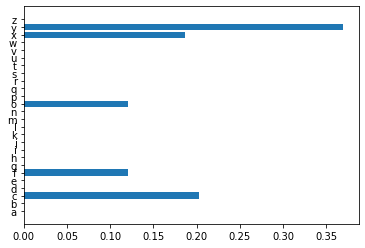

In [409]:
# 수평 그래프
plt.barh(y=model.feature_names_in_,width=np.array(model.feature_importances_))
plt.show()

In [410]:
# 평가
trian_score=model.score(train_X,train_y)
test_score=model.score(test_X,test_y)

print(f"train_score : {trian_score} - test_score : {test_score}")

train_score : 1.0 - test_score : 0.4


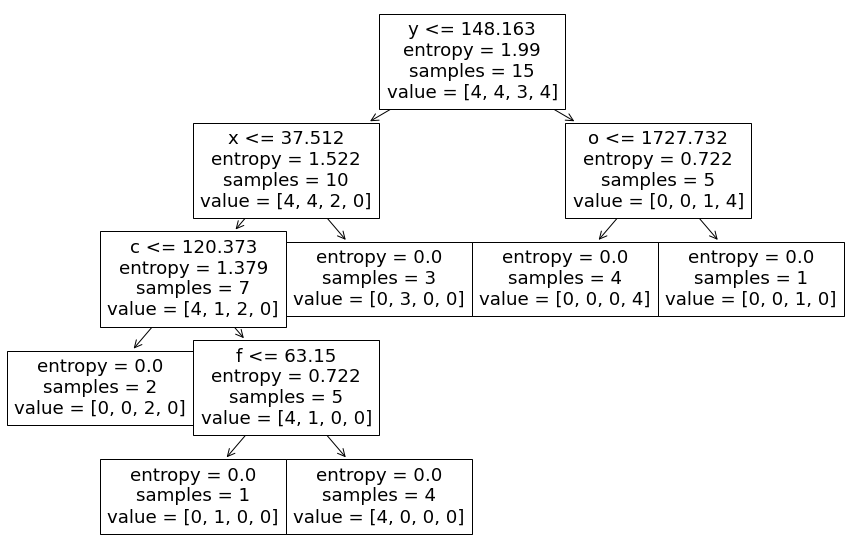

In [411]:
# 결정트리 시각화
plt.figure(figsize=(15,10))
plot_tree(model,feature_names=model.feature_names_in_)
plt.show()

In [412]:
print(f"en-1의 예측 언어는 {model.predict(alpha_find_arr('en-1'))}입니다.")
print(f"en-2의 예측 언어는 {model.predict(alpha_find_arr('en-2'))}입니다.")
print(f"fr-3의 예측 언어는 {model.predict(alpha_find_arr('fr-3'))}입니다.")
print(f"fr-4의 예측 언어는 {model.predict(alpha_find_arr('fr-4'))}입니다.")
print(f"id-5의 예측 언어는 {model.predict(alpha_find_arr('id-5'))}입니다.")
print(f"id-6의 예측 언어는 {model.predict(alpha_find_arr('id-6'))}입니다.")
print(f"tl-7의 예측 언어는 {model.predict(alpha_find_arr('tl-7'))}입니다.")
print(f"tl-8의 예측 언어는 {model.predict(alpha_find_arr('tl-8'))}입니다.")

en-1의 예측 언어는 ['id']입니다.
en-2의 예측 언어는 ['id']입니다.
fr-3의 예측 언어는 ['fr']입니다.
fr-4의 예측 언어는 ['id']입니다.
id-5의 예측 언어는 ['id']입니다.
id-6의 예측 언어는 ['tl']입니다.
tl-7의 예측 언어는 ['tl']입니다.
tl-8의 예측 언어는 ['id']입니다.


C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\whrjs\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

- 결정 트리도 train이나 test데이터 일때는 좋아보지만 막상 새로운 데이터를 넣으니 정학도가 떨어지므로 좋은 방법은 아니라고 생각함